In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [27]:
df = pd.read_csv("C:/Users/User/Downloads/Data.csv")

In [28]:
df.columns =['Col_1', 'Col_2', 'Col_3', 'Col_4', 'Col_5', 'Col_6', 'Col_7', 'Col_7', 'Col_9' ] 

In [29]:
df.head()

,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_7,Col_9
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


In [30]:
#Renaming some values
df['Col_6']=df['Col_6'].replace(['-'],'Unknown')
df['Col_5']=df['Col_5'].replace(['-'],'No answer')

In [31]:
#creating cross table
ct = pd.crosstab(df.Col_6, df.Col_5,margins=False)
ct

Col_5,No answer,Somewhat likely,Somewhat unlikely,Very likely,Very unlikely
Col_6,,,,,
18 - 29,0,61,11,68,36
30 - 44,0,68,14,71,51
45 - 59,0,73,20,128,57
60+,0,71,28,95,64
Unknown,11,1,0,0,0


# Assignment 1
## Chart 1: each row sums up to 100%
### Pyplot Interface

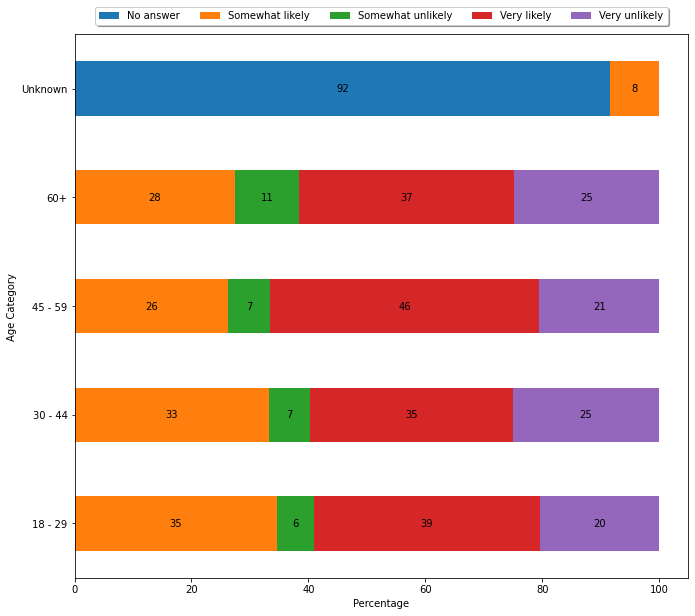

In [32]:
stacked_ct = ct.apply(lambda x: x*100/sum(x), axis=1)
ax = stacked_ct.plot(kind='barh', stacked=True, figsize=(11,10))
plt.xlabel("Percentage")
plt.ylabel("Age Category")
plt.legend(loc='upper center', shadow=True, bbox_to_anchor=(0.15, 0.55, 0.7, 0.51),  ncol=5)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:0.0f}', xy=(left+width/2, bottom+height/2), ha='center', va='center');

### Object-Oriented Interface

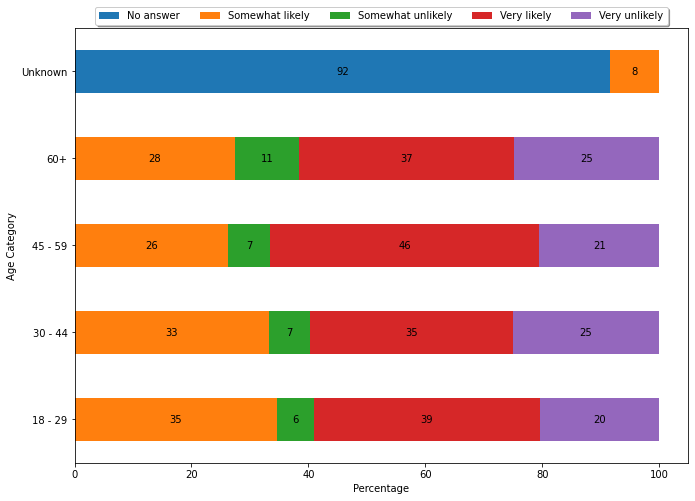

In [33]:
fig, ax = plt.subplots(figsize=(11,8))
stacked_ct.plot(kind='barh', stacked = True,  ax=ax)
ax.set(xlabel='Percentage', ylabel = 'Age Category')
ax.legend(loc='upper center', shadow=True, bbox_to_anchor=(0.15, 0.55, 0.7, 0.51), ncol=5)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:0.0f}', xy=(left+width/2, bottom+height/2), ha='center', va='center');

## Chart 2: Absolute values
### Pyplot Interface

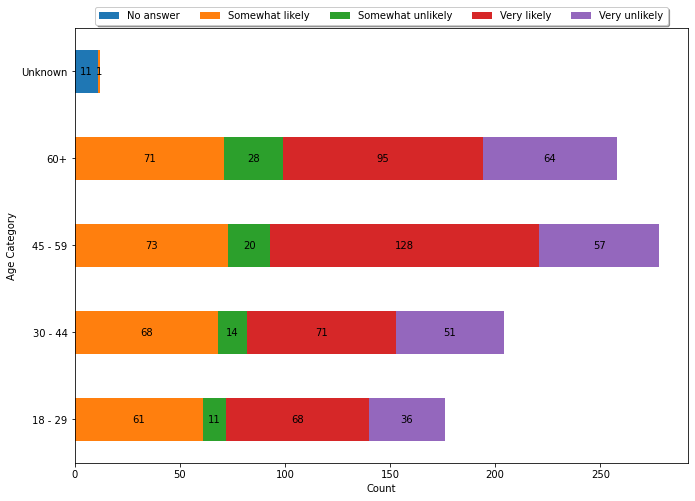

In [34]:
ax = ct.plot.barh(stacked=True, figsize=(11,8))
plt.xlabel("Count")
plt.ylabel("Age Category")
plt.legend(loc='upper center', shadow=True, bbox_to_anchor=(0.15, 0.55, 0.7, 0.51), ncol=5)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:0.0f}', xy=(left+width/2, bottom+height/2), ha='center', va='center');

### Object-Oriented Interface

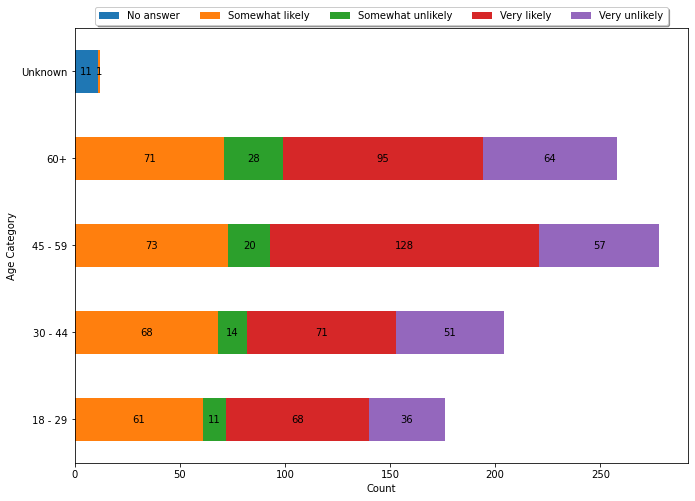

In [35]:
fig, ax = plt.subplots(figsize=(11,8))
ct.plot(kind='barh', stacked = True,  ax=ax)
ax.set(xlabel='Count', ylabel = 'Age Category')
ax.legend(loc='upper center', shadow=True, bbox_to_anchor=(0.15, 0.55, 0.7, 0.51),   labelspacing = 5, ncol=5)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:0.0f}', xy=(left+width/2, bottom+height/2), ha='center', va='center');

# Assignment 2
## Create a grid of plots to show 2 plots and a description
### Chart 1: rows sum up to 100%
### Chart 2: absolute values
### Chart 3: Describe what you have seen in the previous 2 charts

Text(0.5, 0.5, 'Elder people are potentail users so manufacturer must carefully design every detail.')

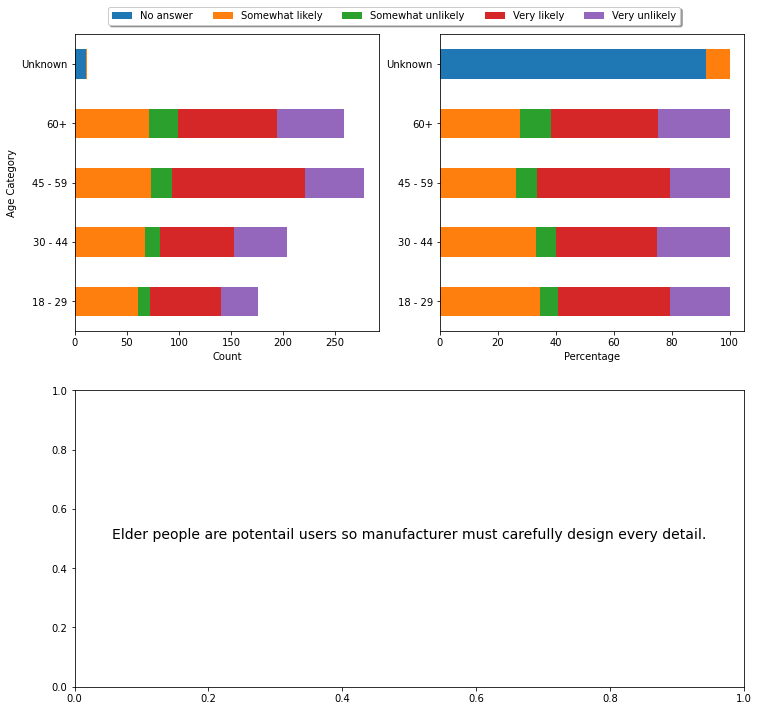

In [44]:
fig = plt.figure(figsize = (12,12))

gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

ct.plot(kind='barh', stacked = True,  ax=ax1)
ax1.set(xlabel='Count', ylabel = 'Age Category')
ax1.legend(loc='upper center', shadow=True, bbox_to_anchor=(0.7, 0.6, 0.7, 0.51), ncol=5)

stacked_ct.plot(kind='barh', stacked = True,  ax=ax2)
ax2.set(xlabel='Percentage', ylabel = " ")
ax2.legend().set_visible(False)

t = 'Elder people are potentail users so manufacturer must carefully design every detail.'
ax3.text(0.5, 0.5, t,  size = 14,ha='center', wrap=True,  transform=ax3.transAxes)

